# Coding Companion for Intuitive Deep Learning Part 1 (Annotated)

In this notebook, we'll go through the code for the coding companion for Intuitive Deep Learning Part 1 ([Part 1a](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1a-introduction-to-neural-networks-d7b16ebf6b99), [Part 1b](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1b-introduction-to-neural-networks-8565d97ddd2d)) to create your very first neural network to predict whether the house price is below or above median value. We will go through the following in this notebook:

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network

The code is annotated throughout the notebook and you simply need to download the dataset [here](https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view), put the dataset in the same folder as this notebook and run the code cells below. Note that the results you get might differ slightly from the blogpost as there is a degree of randomness in the way we split our dataset as well as the initialization of our neural network.

# Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

Now, we split the dataset into our input features and the label we wish to predict.

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [14]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6782 - accuracy: 0.6830 - val_loss: 0.6757 - val_accuracy: 0.6895
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6957 - val_loss: 0.6710 - val_accuracy: 0.6438
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6683 - val_loss: 0.6658 - val_accuracy: 0.6484
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6761 - val_loss: 0.6599 - val_accuracy: 0.6804
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6928 - val_loss: 0.6535 - val_accuracy: 0.7078
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.7260 - val_loss: 0.6470 - val_accuracy: 0.7215
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.7378 - val_loss: 0.6396 - val_accuracy: 0.7443
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8845 - val_loss: 0.3354 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8836 - val_loss: 0.3321 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8826 - val_loss: 0.3321 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8796 - val_loss: 0.3305 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8806 - val_loss: 0.3279 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8885 - val_loss: 0.3270 - val_accuracy: 0.8447
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8894 - val_loss: 0.3267 - val_accuracy: 0.8493
Epoch 

Evaluating our data on the test set:

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 665us/step - loss: 0.3008 - accuracy: 0.8858


0.8858447670936584

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [19]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

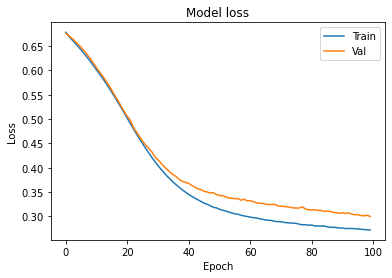

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

In [21]:
'''plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()'''

KeyError: 'acc'

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4904 - accuracy: 0.7632 - val_loss: 0.4103 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3237 - accuracy: 0.8591 - val_loss: 0.3662 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3145 - accuracy: 0.8718 - val_loss: 0.3273 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3036 - accuracy: 0.8748 - val_loss: 0.3128 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3019 - accuracy: 0.8806 - val_loss: 0.2967 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2865 - accuracy: 0.8855 - val_loss: 0.2771 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2689 - accuracy: 0.8924 - val_loss: 0.2667 - val_accuracy: 0.8767
Epoch 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

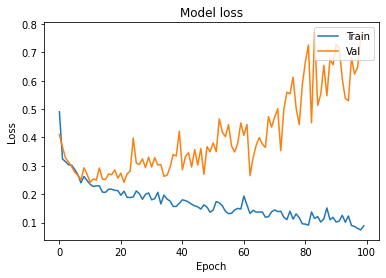

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [25]:
'''plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show() '''

"plt.plot(hist_2.history['acc'])\nplt.plot(hist_2.history['val_acc'])\nplt.title('Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='lower right')\nplt.show() "

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 14.2398 - accuracy: 0.6370 - val_loss: 3.9143 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 1.6631 - accuracy: 0.8395 - val_loss: 0.6812 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5709 - accuracy: 0.8708 - val_loss: 0.5343 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5140 - accuracy: 0.8640 - val_loss: 0.5054 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4944 - accuracy: 0.8620 - val_loss: 0.5104 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4931 - accuracy: 0.8738 - val_loss: 0.4777 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4848 - accuracy: 0.8796 - val_loss: 0.4755 - val_accuracy: 0.8584
Epoch

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

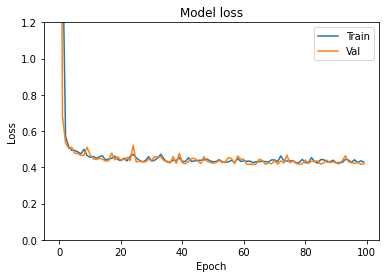

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [31]:
'''plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()'''

"plt.plot(hist_3.history['acc'])\nplt.plot(hist_3.history['val_acc'])\nplt.title('Model accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Val'], loc='lower right')\nplt.show()"

As compared to Model 2, you should see that there's less overfitting!